**Introduction**

As a data science consultant, I have been employed by a clothing manufacturer as a data science consultant to analyze and evaluate their sales and order dataset in order to show some business insights. The dataset includes information that is deemed to be reasonably satisfactory, including order numbers, order placements, product SKUs, item colors and sizes, unit retail price, quantity sold, and revenue amount. The business wishes to explore various customer, product, and revenue-generating trends. Through the use of an explanatory data analysis (EDA) pipeline, I hope to produce useful insights that will enable the organization to maximize both its operations and product offerings by responding to a series of clearly defined business inquiries.

**Business problem:**

Which are the most valuable customers for the store? Knowing their demographics and purchase that could enable the marketer to target certain marketing campaigns and do personalized recommendations and specific colors and sizes.

**About the dataset:**

order_id: unique ID for each order

order_date: date and time of the order

sku: a number used by retailer to assign their products by size

color: color of product

size: size of the product

unit_price: unit price of product

quantity: quantity ordered for that product

revenue: unitprice * quantity


Dataset Link: https://www.kaggle.com/datasets/shilongzhuang/-women-clothing-ecommerce-sales-data


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import seaborn as sns

**Import dataset**

In [ ]:
df_org = pd.read_csv("/content/women_clothing_ecommerce_sales 5.csv")

In [ ]:
df = df_org.copy()
df

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264
...,...,...,...,...,...,...,...,...
522,171,2022/9/9 6:27:00,799,Dark Blue,M,265,1,265
523,172,2022/9/9 7:18:00,708,Dark Blue,4XL,278,1,278
524,173,2022/9/9 7:22:00,799,Dark Blue,M,265,1,265
525,174,2022/9/9 8:25:00,799,Dark Blue,L,265,1,265


I started by doing a copy to work on it as I need, so to keep the original data as it was.

**Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


In [ ]:
df.describe()

,order_id,unit_price,quantity,revenue
count,527.000000,527.000000,527.000000,527.000000
mean,115.313093,274.973435,1.011385,278.024668
std,73.106716,34.517412,0.106193,44.741095
min,1.000000,191.000000,1.000000,191.000000
25%,54.000000,266.000000,1.000000,266.000000
50%,110.000000,278.000000,1.000000,278.000000
75%,166.000000,288.000000,1.000000,288.000000
max,273.000000,899.000000,2.000000,899.000000


In [ ]:
df.isna().sum()

,0
order_id,0
order_date,0
sku,0
color,0
size,37
unit_price,0
quantity,0
revenue,0


Checking the missing values and NaN

In [ ]:
df.dropna(inplace = True)

The drop the rows or columns who are missing

In [ ]:
df.isna().sum()

,0
order_id,0
order_date,0
sku,0
color,0
size,0
unit_price,0
quantity,0
revenue,0


In [ ]:
df

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264
...,...,...,...,...,...,...,...,...
522,171,2022/9/9 6:27:00,799,Dark Blue,M,265,1,265
523,172,2022/9/9 7:18:00,708,Dark Blue,4XL,278,1,278
524,173,2022/9/9 7:22:00,799,Dark Blue,M,265,1,265
525,174,2022/9/9 8:25:00,799,Dark Blue,L,265,1,265


**Business Questions**

**1- Which color and size combinations seem to fly off the shelves?**

In [ ]:
color_size_mostpopularity = df.groupby(['color', 'size'])['quantity'].sum().sort_values(ascending=False)
print("Most popular color and size combinations are:")
display(color_size_mostpopularity.head(10))

Most popular color and size combinations are:


color       size    
Dark Blue   XL          147
            L            84
            M            80
            2XL          41
            3XL          37
Light Blue  One Size      8
Dark Blue   4XL           7
Grey Wash   XL            6
Black       One Size      6
Dark Blue   One Size      5
Name: quantity, dtype: int64

***Explanation:*** I started by grouping the data by color and size. For each unique combination of color and size, I calculated the sum of quantity, resulting in a third column showing the total quantity sold for each combination.
Finally, by setting ascending=False (descending order), so the color and size combinations with the highest total quantities be at first.

**2- What is the average revenue per oder size?**

In [ ]:
average_revenue_per_quantity = df.groupby('quantity')['revenue'].mean().sort_values(ascending=False)
print("Average Revenue per order size:")
display(average_revenue_per_quantity.round().astype(int))

Average Revenue per order size:


,revenue
quantity,
2,536
1,276


***Explanation:*** I started by grouping the data by size and calculating the average revenue (AOV) for each size. Then, I sorted the results in descending order to show the sizes with the highest average revenue first.

**3- What is the seasonal pattern of revenue? Are there peak seasons?**

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
season_map =  {
    1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring', 6:'Summer', 7:'Summer', 8:'Summer', 9:'Fall', 10:'Fall', 11:'Fall', 12:'Winter'}
df['season'] = df['order_date'].dt.month.map(season_map)

seasonal_revenue = df.groupby('season')['revenue'].sum().sort_values(ascending=False)
print("Total Revenue by Season:")
display(seasonal_revenue)

Total Revenue by Season:


,revenue
season,
Summer,92278
Fall,44645


***Explanation:*** I started by defing the seasons based on months using a mapping dictionary, then I converted the order_date column in DataFrame to datetime format.then I Extracted the month from the order_date column.Groups the DataFrame by the season column and selects the revenue column for aggregation. Finally Calculates the total revenue for each season by summing up the revenue values within each season.

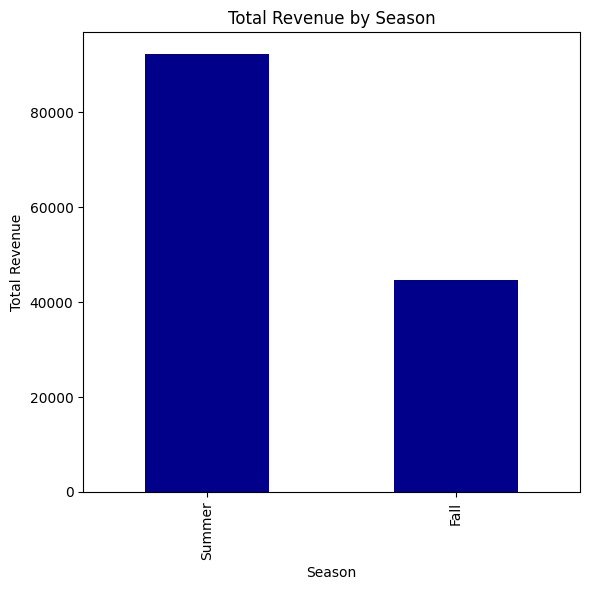

In [ ]:
plt.figure(figsize=(6, 6))
seasonal_revenue.plot(kind='bar', color="darkblue")
plt.title("Total Revenue by Season")
plt.xlabel("Season")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Visualizing the total revenue by each season.
Started by the size of the figure 6x6 inches, then choosed dark blue color to use in the bar chart.
Then I choosed the chart title and x-axis and y-axis, and the x-axis I put it in 90 degrees to make sure it's clear and readable. Finally display the chart.

**4- To what extent (correlation) is sales per order related to the quantity ordered?**

In [ ]:
correlation = df[['quantity', 'revenue']].corr().iloc[0, 1]
print(f"Correlation between quantity ordered and revenue: {correlation}")

Correlation between quantity ordered and revenue: 0.623556508277453


***Explanation:*** I started by selecting the quantity and revenue columns from the DataFrame. Then, I used the (.corr()) method to compute the correlation matrix for these selected columns, which shows the correlation coefficients between each pair of columns. Finally, I used (.iloc[0, 1]) to extract the specific correlation coefficient between the quantity and revenue columns from the correlation matrix.

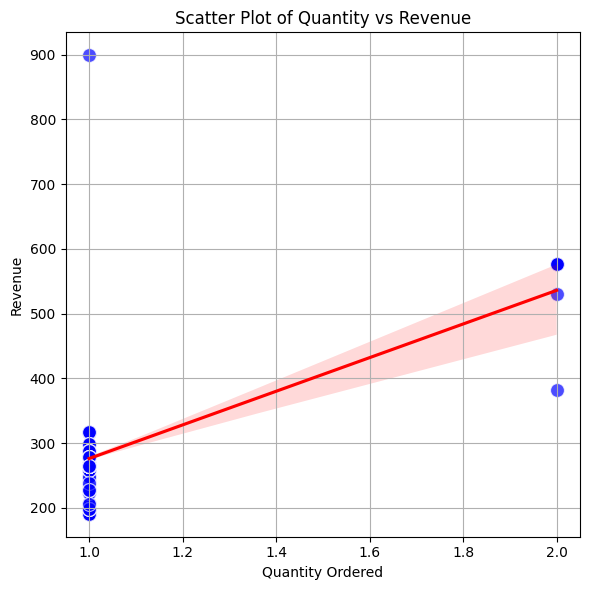

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='quantity', y='revenue', data=df, color='blue', s=100, edgecolor='w', alpha=0.7)
sns.regplot(x='quantity', y='revenue', data=df, scatter=False, color='red')
plt.title('Scatter Plot of Quantity vs Revenue')
plt.xlabel('Quantity Ordered')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

Visualizing the revenue by each quantity ordered. Started by the size of the figure 6x6 inches, then I added the quantity on the x-axis and the revenue on the y-axis, and added the title and diplayed the chart.

**5- How does average value order vary with size?**

In [ ]:
aov_by_size = df.groupby('size')['revenue'].mean().round().astype(int)
print("Average Order Value (AOV) by Size:")
display(aov_by_size)

Average Order Value (AOV) by Size:


,revenue
size,
2XL,289
3XL,283
4XL,356
L,279
M,280
One SIze,198
One Size,262
S,227
XL,280


***Explanation:*** I started by creating a group by the size column and calculated the average revenue for each size. Finally, the code rounds these average revenues to whole numbers and converts them to integers before displaying them, to make the result more straightforward.

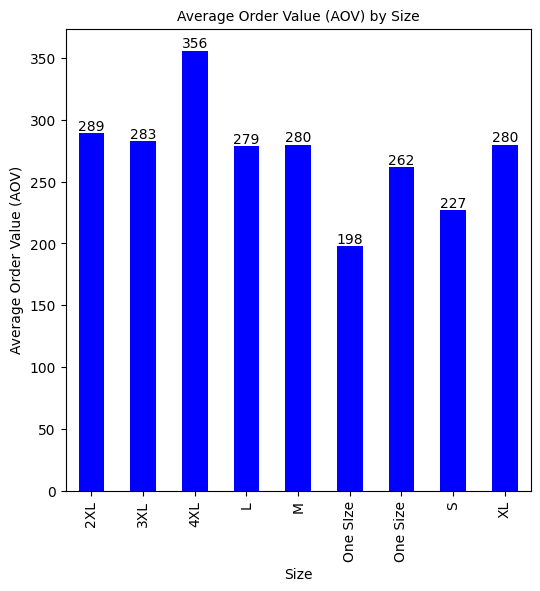

In [ ]:
plt.figure(figsize=(6, 6))
aov_by_size.plot(kind='bar', color='blue')
plt.title('Average Order Value (AOV) by Size', fontsize=10)
plt.xlabel('Size', fontsize=10)
plt.ylabel('Average Order Value (AOV)', fontsize=10)

for index, value in enumerate(aov_by_size):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')

plt.show()

Visualizing the average order value by the size, Started by the size of the figure 6x6 inches, then choosed the blue color for my chart. then choosed the title and the x-axis and y-axis.

**6- How many orders (quantities) are placed on each day of the month?**

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['day_of_month'] = df['order_date'].dt.day
orders_by_day = df.groupby('day_of_month')['quantity'].sum()

print("Orders by Day of the Month:")
display(orders_by_day)

Orders by Day of the Month:


,quantity
day_of_month,
1,7
2,11
3,18
4,21
5,8
6,25
7,16
8,24
9,35


***Explanation:*** I converted the order_date column in the DataFrame to a datetime format using pd.to_datetime(), with invalid dates being set to NaT due to the errors='coerce' option. then I extracted the day of the month from the order_date column and stores it in a new column called (day_of_month). Next, I grouped the data by the day of the month and calculates the total quantity of orders for each day.

<ipython-input-24-32b5b1850347>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="Blues_d")


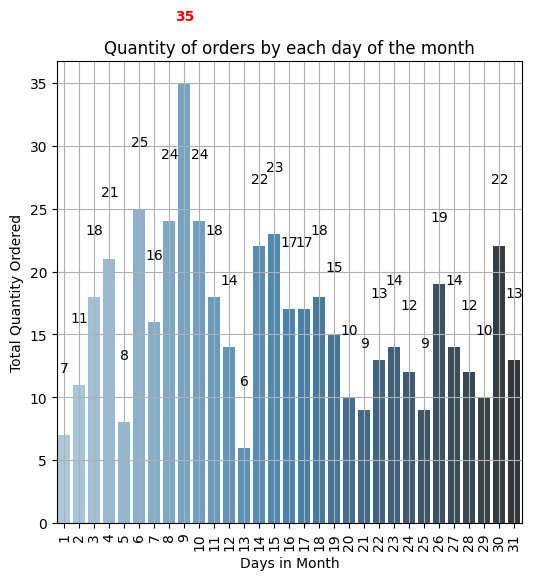

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="Blues_d")
max_quantity = orders_by_day.max()
for i, value in enumerate(orders_by_day):
    if value == max_quantity:
        plt.text(i, value + 5, f'{value:.0f}', ha='center', color='red', weight='bold')
    else:
        plt.text(i, value + 5, f'{value:.0f}', ha='center')
plt.title("Quantity of orders by each day of the month")
plt.xlabel("Days in Month")
plt.ylabel("Total Quantity Ordered")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

 Visualizing the quantity of orders by each day of the month, Started by the size of the figure 6x6 inches. then creates a bar plot with orders_by_day, then choose the "blue" palette. choose the mximum quantity, then specify the x-axis and y-axis and the title for the bar chart.

**7- Which colors of clothing are currently in trend?**

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
color_trend = df.groupby('color')['quantity'].sum().sort_values(ascending=False)
print("Top Colors of Clothing (in trend):")
display(color_trend.head(5))

Top Colors of Clothing (in trend):


,quantity
color,
Dark Blue,401
Light Blue,26
Black,13
Grey Wash,9
Mid Wash,8


***Explanation:*** I started by converting the ‘order_date’ column to a datetime format. Then, I grouped the dataset by the ‘color’ of the clothing items and sums the quantities sold for each color. The result is sorted in descending order to identify which colors are the most popular or trending. Finally, display the top 5 colors with the highest sales quantities.

**Conclusion:**

1- The dominant color, which is 'Dark Blue', is the one in terms of quantity sold and consequently the revenue realized, which indicates that the customers have a very strong preference for that color.

2- 'XL' size is the most popular size followed by 'M' and 'L', that indicates a higher demand for these sizes.